<a href="https://colab.research.google.com/github/jberkow713/DS-Unit-2-Linear-Models/blob/master/Regression_Part_2_Jberkow_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [4]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import datetime as dt
df['created'] = df['created'].apply(pd.to_datetime)

In [14]:
df.dtypes

bathrooms                      float64
bedrooms                         int64
created                 datetime64[ns]
description                     object
display_address                 object
latitude                       float64
longitude                      float64
price                            int64
street_address                  object
interest_level                  object
elevator                         int64
cats_allowed                     int64
hardwood_floors                  int64
dogs_allowed                     int64
doorman                          int64
dishwasher                       int64
no_fee                           int64
laundry_in_building              int64
fitness_center                   int64
pre-war                          int64
laundry_in_unit                  int64
roof_deck                        int64
outdoor_space                    int64
dining_room                      int64
high_speed_internet              int64
balcony                  

In [15]:
df['created'].values

array(['2016-06-24T07:54:24.000000000', '2016-06-12T12:19:27.000000000',
       '2016-04-17T03:26:41.000000000', ...,
       '2016-04-16T02:13:40.000000000', '2016-04-08T02:13:33.000000000',
       '2016-04-12T02:48:07.000000000'], dtype='datetime64[ns]')

In [20]:
#Train/Test Split  Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
df['year'] = pd.DatetimeIndex(df['created']).year
df['year'].head()

0    2016
1    2016
2    2016
3    2016
4    2016
Name: year, dtype: int64

In [23]:
df['month'] = pd.DatetimeIndex(df['created']).month
df['month'].head(25)

0     6
1     6
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    6
12    4
13    4
14    6
15    4
16    4
17    4
18    4
19    4
20    4
21    4
22    4
23    4
24    6
Name: month, dtype: int64

In [174]:

train = df[df['month'] < 6 ]
train.head(25)
train.month.values

array([4, 4, 4, ..., 4, 4, 4])

In [175]:
test = df[df['month'] > 5 ] 
test.head(25)
test.month.values

array([6, 6, 6, ..., 6, 6, 6])

In [176]:
train.shape, test.shape

((31844, 36), (16973, 36))

In [0]:
 #Engineer at least two new features. (See below for explanation & ideas.)

train.head()
train['price'].mean()
target = 'price'
y_train = train[target]
y_test = test[target]

In [178]:
print('Mean Baseline (using 0 features)')
guess = y_train.mean()
print(guess)

Mean Baseline (using 0 features)
3575.604007034292


In [179]:
#Train Error
from sklearn.metrics import mean_absolute_error

y_pred = [guess] * len(y_train)
mae_train = mean_absolute_error(y_train, y_pred)
print(f'Train Error (New York City apartment rental listing data) : {mae_train:.2f} dollars')

Train Error (New York City apartment rental listing data) : 1201.88 dollars


In [180]:
#Test Error
y_pred = [guess] * len(y_test)
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Test Error (New York City apartment rental listing data) : {mae_test:.2f} dollars')

Test Error (New York City apartment rental listing data) : 1197.71 dollars


In [0]:
# Fit a linear regression model with at least two features.
#    Does the apartment have a description?
#    How long is the description?
#    How many total perks does each apartment have?
#    Are cats or dogs allowed?
#    Are cats and dogs allowed?
#    Total number of rooms (beds + baths)
#    Ratio of beds to baths
#    What's the neighborhood, based on address or latitude & longitude?



In [181]:
#one variable regression first
import pandas as pd
import plotly.express as px

px.scatter(
    train,
    x='bathrooms',
    y='price',
    text='year',
    title='Apartment Prices in NYC',
    trendline='ols',  # Ordinary Least Squares
)

In [0]:
#now two variable linear regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [186]:
#Arrange X Features
features = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'elevator', 'laundry_in_unit', 'high_speed_internet', 'doorman', 'wheelchair_access', 'hardwood_floors' ]
X_test = test[features]
print(f'Linear Regression, dependent on: {features}')

Linear Regression, dependent on: ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'elevator', 'laundry_in_unit', 'high_speed_internet', 'doorman', 'wheelchair_access', 'hardwood_floors']


In [187]:
# Fit the model
model.fit(X_train, y_train)
y_pred_2 = model.predict(X_train)
mae_2feature_train = mean_absolute_error(y_train, y_pred_2)
print(f'Train Error: {mae_2feature_train:.2f} dollars')

Train Error: 695.28 dollars


In [188]:
# Apply model to new data

y_pred_2test = model.predict(X_test)
mae_2feature_test = mean_absolute_error(y_test, y_pred_2test)
print(f'Test Error {mae_2feature_test:.2f} dollars')

Test Error 705.40 dollars


In [0]:
# Get the model's coefficients and intercept.

In [191]:
model.intercept_, model.coef_

(-1079636.3750428648,
 array([  1807.30675675,    469.86568396,   1552.67910543, -13745.62299455,
           155.05119801,    502.11746052,   -384.36705847,    511.70627152,
          -214.9051228 ,   -381.22203241]))

In [192]:
beta0 = model.intercept_
beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9, beta10  = model.coef_
print(f'y = {beta0} + {beta1}x1 + {beta2}x2 + {beta3}x3 + {beta4}x4 + {beta5}x5+ {beta6}x6 + {beta7}x7 + {beta8}x8 + {beta9}x9 + {beta10}x10')

y = -1079636.3750428648 + 1807.3067567513503x1 + 469.8656839616856x2 + 1552.6791054294183x3 + -13745.622994546124x4 + 155.05119801142808x5+ 502.1174605174666x6 + -384.36705847052144x7 + 511.7062715241297x8 + -214.90512280374966x9 + -381.22203241241607x10


In [193]:
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string())

Intercept -1079636.3750428648
bathrooms               1807.306757
bedrooms                 469.865684
latitude                1552.679105
longitude             -13745.622995
elevator                 155.051198
laundry_in_unit          502.117461
high_speed_internet     -384.367058
doorman                  511.706272
wheelchair_access       -214.905123
hardwood_floors         -381.222032


In [0]:
#Get regression metrics RMSE, MAE, and R2, for both the train and test data.

In [0]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [0]:
def squared_errors(df, features, target, m, b):
    """
    Visualize linear regression, with squared errors,
    in 2D: 1 feature + 1 target.
    
    Use the m & b parameters to "fit the model" manually.
    
    df : Pandas DataFrame
    feature : string, feature column in df
    target : string, target column in df
    m : numeric, slope for linear equation
    b : numeric, intercept for linear requation
    """
    
    # Plot data
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    df.plot.scatter(features, target, ax=ax)
    
    # Make predictions
    x = df[features]
    y = df[target]
    y_pred = m*x + b
    
    
    
    # Print regression metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)

Mean Squared Error: 3105028.217891242
Root Mean Squared Error: 1762.1090255404863
Mean Absolute Error: 1201.8811133681572
R^2: 0.0


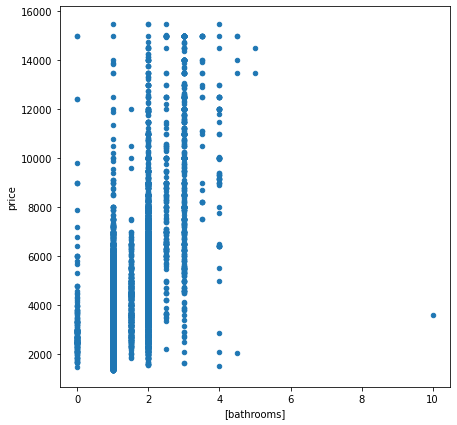

In [216]:
features = ['bathrooms' ]
squared_errors(train, features, target, m=0, b=y_pred_2.mean())

Mean Squared Error: 3116942.471727713
Root Mean Squared Error: 1765.486468859989
Mean Absolute Error: 1175.9396107426132
R^2: -0.0028703805753926837


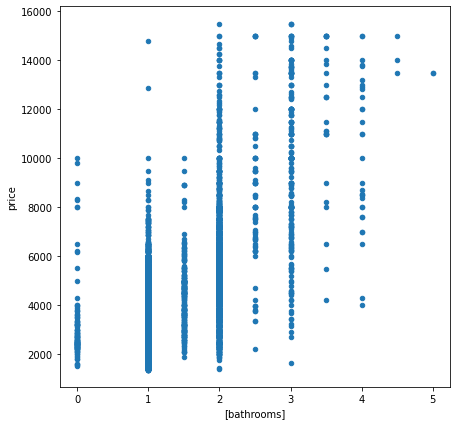

In [215]:
features = ['bathrooms' ]
squared_errors(test, features, target, m=0, b=y_pred_2test.mean())

In [0]:
#What's the best test MAE you can get? Share your score and features used with your cohort on Slack!